In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

pd.set_option('display.float_format', lambda x: '%.10f' % x)

%matplotlib inline

In [2]:
import os
folder = os.getcwd()

In [3]:
%matplotlib inline

In [95]:
data = pd.read_csv('train.csv', nrows = 300000000)
%%timeit

In [ ]:
#data2 = pd.read_csv('train.csv', nrows = 300000000)
#data3

In [97]:
#data = pd.read_csv('train.csv')
#%timeit

In [98]:
data.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [99]:
data.shape

(300000000, 2)

In [ ]:
#data2

In [291]:
data_sparse = data.iloc[::100]

In [292]:
data_sparse.shape

(3000000, 2)

In [293]:
data_sparse.max()

acoustic_data     3476.0000000000
time_to_failure     16.1073999840
dtype: float64

(5000000, 6000000)

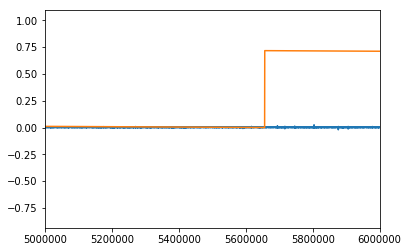

In [294]:
#plt.figure(figsize = (8,3))
plt.plot(data_sparse.acoustic_data/data_sparse.acoustic_data.max())
plt.plot(data_sparse.time_to_failure/data_sparse.time_to_failure.max())
plt.xlim(5000000, 6000000)

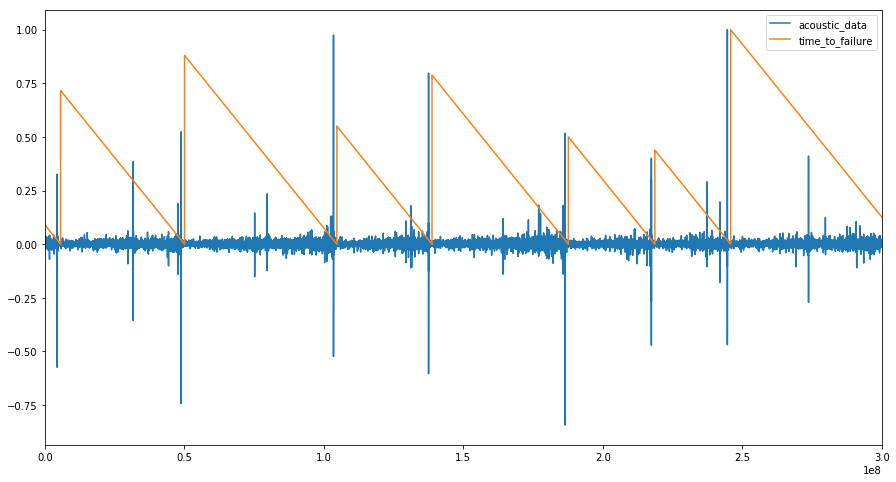

In [296]:
(data_sparse/data_sparse.max()).plot(figsize=(15, 8))

#### Find indexes of Ground Zeros

In [297]:
idx_earthquake = data_sparse[data_sparse.time_to_failure.diff()>0].index
len(idx_eq)
idx_earthquake_df = pd.DataFrame(data = idx_earthquake)
idx_earthquake_df

,0
0,5656600
1,50085900
2,104677400
3,138772500
4,187641900
5,218652700
6,245829600


#### Calculate length of the segments

In [298]:
segments_len = [idx_earthquake[0]]
for i in range(len(idx_earthquake) - 1): 
    seg_len = idx_earthquake[i+1] - idx_earthquake[i]
    segments_len.append(seg_len)
segments_len  

[5656600, 44429300, 54591500, 34095100, 48869400, 31010800, 27176900]

#### Sliding Window

In [299]:
idx_earthquake_df

,0
0,5656600
1,50085900
2,104677400
3,138772500
4,187641900
5,218652700
6,245829600


In [300]:
# Sliding window definitions: 
win_length = 150
segments_len

[5656600, 44429300, 54591500, 34095100, 48869400, 31010800, 27176900]

In [301]:
segment_num = 1

In [302]:
idx_earthquake_df.iloc[segment_num, 0]

50085900

In [303]:
idx_earthquake_df.iloc[segment_num, 0]

50085900

In [304]:
segments_len[1]

44429300

In [305]:
data_sparse.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
100,-1,1.4690998732
200,7,1.4690997632
300,-4,1.4690996532
400,9,1.4690995432


In [306]:
data_sparse.time_to_failure.loc[idx_earthquake_df.iloc[0, 0]]

11.540799958

In [307]:
data_sparse.time_to_failure.iloc[50]

1.4680989888

In [ ]:
def sliding_win(data_sparse, idx_earthquake_df, segment_num, segments_len, win_length):
    
    # choose the segment
    signal_length = segments_len[segment_num]
    
    # sliding window
    for i in range(signal_length, -1):
        # start from the ground zero
        
        # do time-freq analysis
        timefreq_analysis()
        
        # go until previous ground zero
    
    

In [254]:
from numpy.fft import fft, ifft
from scipy import signal, fftpack

In [ ]:
# autocorrelation 

In [309]:
segment1 = data_sparse.loc[(idx_earthquake_df.iloc[0, 0] - 300000):idx_earthquake_df.iloc[0, 0]]
signal = segment1.acoustic_data
np.asarray(signal)
signal.shape

(3001,)

In [310]:
signal_fft = fftpack.fft(signal)
signal_fft

array([12913.          +0.j        ,  -129.06604564 +36.345319j  ,
         -84.05887626 -35.39386038j, ...,  -100.45425705-255.79960868j,
         -84.05887626 +35.39386038j,  -129.06604564 -36.345319j  ])

(0, 600)

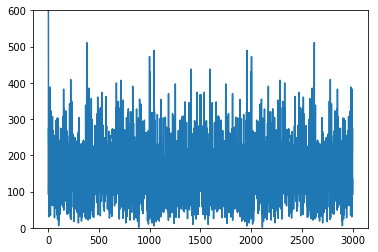

In [312]:
plt.plot(np.abs(signal_fft))
plt.ylim(0, 600)

In [246]:
def timefreq_analysis():
    pass

In [133]:
idx_earthquake = [0] + list(idx_eq)
idx_earthquake_dict = {'ground_zero': []}
idx_earthquake_dict

{'ground_zero': []}

In [134]:
len(idx_eq)

7

In [135]:
for i in range(len(idx_eq)):
    idx_earthquake_dict["ground_zero"].append(idx_eq[i])

idx_earthquake_df = pd.DataFrame(data = idx_earthquake_dict)

In [136]:
idx_earthquake_df

,ground_zero
0,5656600
1,50085900
2,104677400
3,138772500
4,187641850
5,218652650
6,245829600


In [76]:
location = idx_earthquake_df.iloc[0, 0]
location

5656600

In [79]:
data_sparse.loc[location - 50]

acoustic_data     8.0000000000
time_to_failure   0.0007955051
Name: 5656550, dtype: float64

In [77]:
data_sparse.loc[location]

acoustic_data      2.0000000000
time_to_failure   11.5407999580
Name: 5656600, dtype: float64

In [78]:
data_sparse.loc[location + 50]

acoustic_data      1.0000000000
time_to_failure   11.5407999030
Name: 5656650, dtype: float64

In [41]:
data_sparse

,acoustic_data,time_to_failure
0,12,1.4690999832
50,11,1.4690999282
100,-1,1.4690998732
150,3,1.4690998182
200,7,1.4690997632
250,7,1.4690997082
300,-4,1.4690996532
350,9,1.4690995982
400,9,1.4690995432
450,5,1.4690994882


#### Sliding Window

In [ ]:
# Sliding window definitions: 
win_length = 150
signal_length = 

In [ ]:
def sliding_win(win_length):
    
    for i in range(signal_length, -1):
        pass
    
    

In [56]:
idx_earthquake_df.iloc[0]

init     5656600
fin     50085899
Name: 0, dtype: int64

In [49]:
for i in range(ll2['fin'][0], ll2["init"][0], -1000000):
    print(i)

5656599
4656599
3656599
2656599
1656599
656599
